# Big Data Analitics Security


### Laboratory 1a "Data visualisation in Python"

# Exercise 1 - DATA

Download from https://www.eea.europa.eu (Analysis and data -> Datahub) and download the chosen data on Europe.

Using the library matplotlib, prepare various graphs presenting the data from the selected files. Each graph should have a title, described axes and a legend.

Prepare five different types of charts.

For details on the matplotlib library, go to matplotlib.org (Quick start guide).


Check if it is possible to save the prepared charts to pdf files.


## Graph for all Bathing Waters altogether

In [1]:
import openpyxl
import matplotlib.pyplot as plt

workbook = openpyxl.load_workbook('PL_BW2022.xlsx')
sheet = workbook['PL_BW2022']

bathing_water_data = {}
first_row = True

for row in sheet.iter_rows(values_only=True):
    if first_row:
        first_row = False
        continue

    bathing_water_name = row[3]
    if isinstance(bathing_water_name, str):
        qualities = [int(str(quality)[0]) if quality is not None else None for quality in row[9:42]]
        bathing_water_data[bathing_water_name] = qualities

workbook.close()

# Plotting graphs for each bathing water
for name, qualities in bathing_water_data.items():
    years = range(1990, 1990 + len(qualities))
    # plt.plot(years, qualities, label=name)

# plt.xlabel('Year')
# plt.ylabel('Quality')
# plt.title('Bathing Water Quality Over the Years')
# plt.legend()
# plt.show()


## Graph for chosen bathingWater

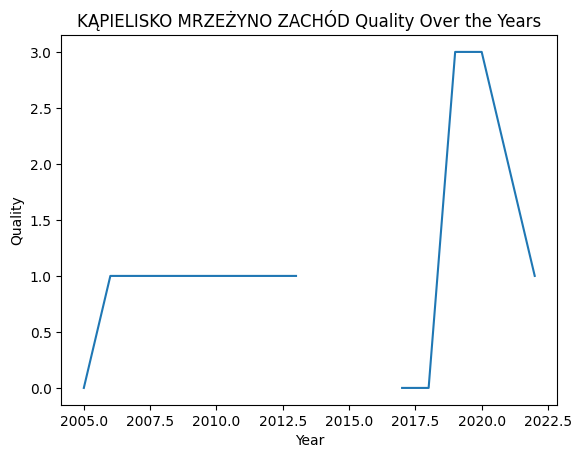

In [2]:
import openpyxl
import matplotlib.pyplot as plt

workbook = openpyxl.load_workbook('PL_BW2022.xlsx')
sheet = workbook['PL_BW2022']

bathing_water_data = {}
first_row = True

for row in sheet.iter_rows(values_only=True):
    if first_row:
        first_row = False
        continue

    bathing_water_name = row[3]
    if isinstance(bathing_water_name, str):
        qualities = [int(str(quality)[0]) if quality is not None else None for quality in row[9:42]]
        bathing_water_data[bathing_water_name] = qualities

workbook.close()

chosen_bathing_water = input("Enter the name of the bathing water you want to plot: ")
# for example: 
# GIEWARTÓW MICHASIÓWKA
# KĄPIELISKO MRZEŻYNO ZACHÓD
# KĄPIELISKO RUSAŁKA NA JEZIORZE RUSAŁKA




if chosen_bathing_water in bathing_water_data:
    qualities = bathing_water_data[chosen_bathing_water]
    years = range(1990, 1990 + len(qualities))
    
    plt.plot(years, qualities)
    plt.xlabel('Year')
    plt.ylabel('Quality')
    plt.title(f'{chosen_bathing_water} Quality Over the Years')
    plt.show()
else:
    print("Bathing water not found in the dataset.")


## Average Quality for Types of Bathing Waters

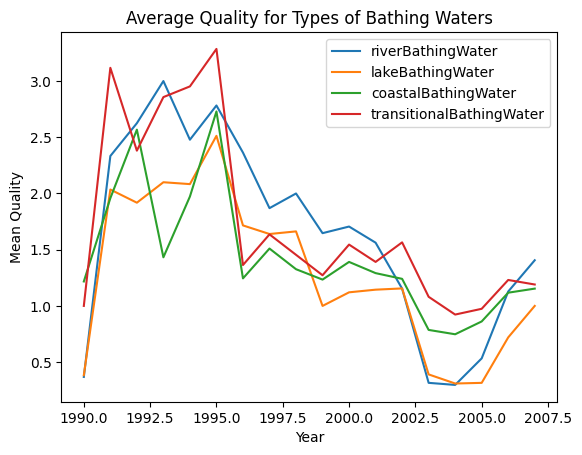

In [3]:
import openpyxl
import matplotlib.pyplot as plt

workbook = openpyxl.load_workbook('PL_BW2022.xlsx')
sheet = workbook['PL_BW2022']

bathing_water_data = {
    'riverBathingWater': [],
    'lakeBathingWater': [],
    'coastalBathingWater': [],
    'transitionalBathingWater': []
}

first_row = True

for row in sheet.iter_rows(values_only=True):
    if first_row:
        first_row = False
        continue

    bathing_water_type = row[4]
    if isinstance(bathing_water_type, str):
        qualities = [int(str(quality)[0]) if quality is not None else None for quality in row[9:42]]

        if bathing_water_type in bathing_water_data:
            bathing_water_data[bathing_water_type].append(qualities)

workbook.close()

mean_qualities = {}
for water_type, data in bathing_water_data.items():
    mean_quality = [
        sum(filter(None, quality_list)) / len([q for q in quality_list if q is not None]) 
        for quality_list in zip(*data) if len([q for q in quality_list if q is not None]) > 0
    ]
    mean_qualities[water_type] = mean_quality

for water_type, mean_quality in mean_qualities.items():
    plt.plot(range(1990, 1990 + len(mean_quality)), mean_quality, label=water_type)

plt.xlabel('Year')
plt.ylabel('Mean Quality')
plt.title('Average Quality for Types of Bathing Waters')
plt.legend()
plt.show()


# Exercise 2 - Results

From the files used in the previous exercise, select the data (column) and save it in the file you created.

In [4]:
import openpyxl

workbook = openpyxl.load_workbook('PL_BW2022.xlsx')
sheet = workbook['PL_BW2022']

bathing_water_data = {}
first_row = True

for row in sheet.iter_rows(values_only=True):
    if first_row:
        first_row = False
        continue

    bathing_water_name = row[3]
    if isinstance(bathing_water_name, str):
        qualities = [int(str(quality)[0]) if quality is not None else None for quality in row[9:42]]
        bathing_water_data[bathing_water_name] = qualities

workbook.close()

with open('bathing_water_data.txt', 'w', encoding='utf-8') as file:
    for name, qualities in bathing_water_data.items():
        file.write(f"Bathing Water: {name}\n")
        file.write("Year\tQuality\n")
        for year, quality in enumerate(qualities, start=1990):
            file.write(f"{year}\t{quality}\n")
        file.write("\n")
